In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


**Data Loading**

Here training data and test data both are loaded.

All the codes are applied on training data. Test data set is used only at the time of submission.

In [2]:
train = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

**Shape of the dataset**

The training dataset has 13636 rows and 15 columns.

In [3]:
train.shape

(13636, 15)

**Information about the data**

It has the information like number of rows and columns in te dataset. All the column names along with datatype of each column. 
We can see that, the dataset contains two types of data. Integer and object.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


**Sample Data**

Here we can see first 5 records of the dataset.

In [5]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


**Statistics of training data**

Here we can see the statistics of the numerical data. The statistics are like count, mean, standard deviation, minimum value, maximum value, percentile for each numerical column.

In [6]:
train.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


**Statistics of target column**

We are using the **Rating** column as target column. Here we are analysing how many records are there for each Rating.

In [7]:
train['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

**Histogram of Ratings column**

This is the pictorial representation of Rating column analysis.

Here we can see that most of the recipes has rating 5.

Text(0, 0.5, 'Recipe Ratings count')

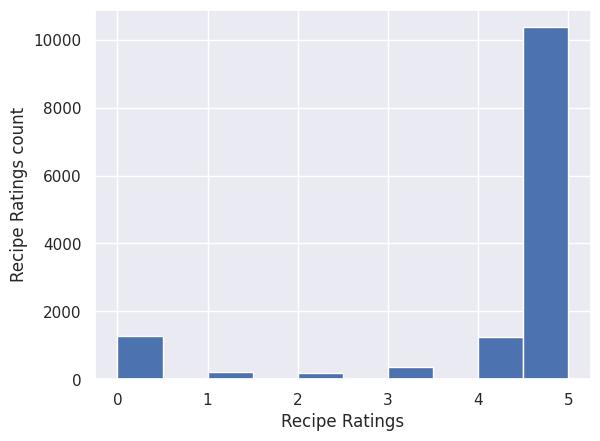

In [9]:
sns.set()
train.Rating.hist()
plt.xlabel('Recipe Ratings')
plt.ylabel('Recipe Ratings count')

**Histogram of RecipeNumber column.**

Here we can identify that out of 100 recipes first 10 recipes has most reviews. 

Text(0, 0.5, 'Recipe Number count')

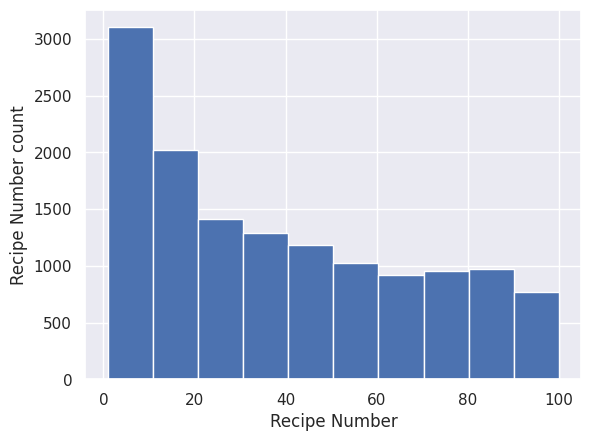

In [10]:
sns.set()
train.RecipeNumber.hist()
plt.xlabel('Recipe Number')
plt.ylabel('Recipe Number count')

**Scatter plot between RecipeNumber and ThumbsUpCount**

Here we are trying to understand relation between RecipeNumber and count of thumbs up. Here X axis represent the RecipeNumber and Y axis represent the ThumbsUpCount. Major thumbsup count for each recipe is within 10. 

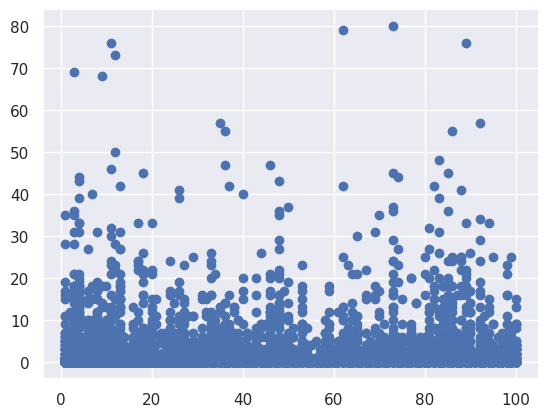

In [11]:
plt.scatter(train['RecipeNumber'],train['ThumbsUpCount'])

**Scatter plot between RecipeNumber and ThumbsDownCount**

Here we are trying to understand relation between RecipeNumber and count of thumbs down. Here X axis represent the RecipeNumber and Y axis represent the ThumbsDownCount. Major thumbsdown count for each recipe is within 10. 

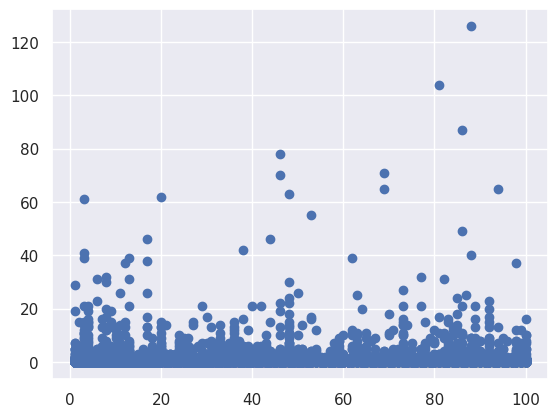

In [12]:
plt.scatter(train['RecipeNumber'],train['ThumbsDownCount'])

**Boxplot for outliers applied in RecipeNumber column.**

Maximum value = 100
Minimum value = 0
upper quartile = approx 61
lower quartile = approx 17
median = approx 35

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5986d166e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5986d17eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5986d177f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5986d54430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5986d546d0>],
 'means': []}

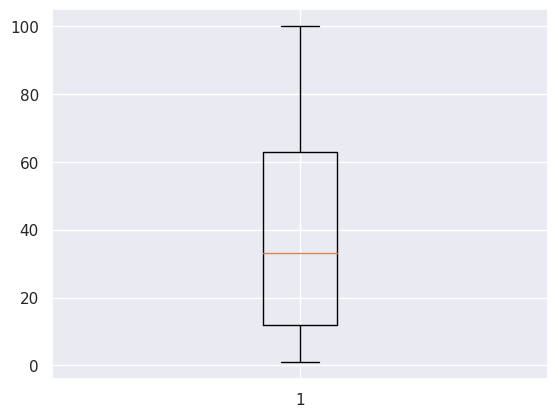

In [13]:
plt.boxplot(train['RecipeNumber'])

**Heatmap between ReplyCount, ThumbsUpCount, ThumbsDownCOunt and Rating**

Here we can see that, Rating is connected with ReplyCount, ThumbsUpCount and ThumbsDownCount.

In [14]:
data = {'ReplyCount' : train['ReplyCount'],'ThumbsUpCount' : train['ThumbsUpCount'],'ThumbsDownCount' : train['ThumbsDownCount'],'Rating' : train['Rating']}
dataframe = pd.DataFrame(data, columns=['ReplyCount','ThumbsUpCount','ThumbsDownCount','Rating'])
matrix = dataframe.corr()
matrix

,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating
ReplyCount,1.000000,0.220929,0.293614,-0.124860
ThumbsUpCount,0.220929,1.000000,0.392564,-0.051752
ThumbsDownCount,0.293614,0.392564,1.000000,-0.142273
Rating,-0.124860,-0.051752,-0.142273,1.000000


<Axes: >

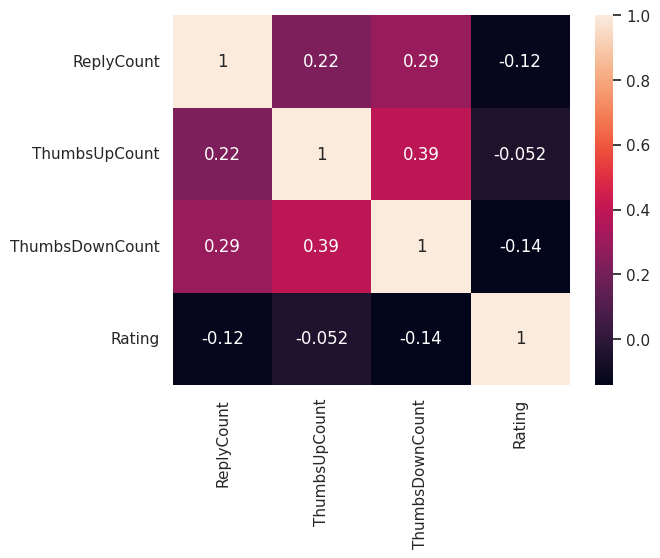

In [15]:
sns.heatmap(matrix,annot= True)

**This identifies number of null values of each column.**

In [16]:
train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

**Here it dentifies those 2 records which has null value.**

In [17]:
null_mask = train.isnull().any(axis=1)
null_rows = train[null_mask]
null_rows

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
2984,299,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_260817,u_1oKXz42APTrXTFF6SGvR3YMBJGy,TRGriggs,1,1622717652,0,0,0,5,100,NaN
11654,344,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_260955,u_1oKZmfyycO3xVnQeffIKHuaKT2U,No.1FamilyBaker,1,1622717645,0,0,0,5,100,NaN


**Droping the rows which has null values.**

In [18]:
train = train.dropna()
test = test.dropna()

**Considering Rating as target column and others are feature columns.**

In [19]:
y = train['Rating']
x = train.drop('Rating',axis=1)

**Checking for the null value. No null value should be there as we dropped it from the dataset.**

In [20]:
train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

**Splitting the training data set with 20% test data set and 80% training data set.**

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

**Seperate coloumns based on data types. As there are only 2 types of data, numerical and categorical. Here it is done by make_column_selector. Then from categorical data, separated the review column as that needs diiferent kind of attention.**

In [22]:
from sklearn.compose import make_column_selector
numerical_col_selector = make_column_selector(dtype_exclude = object)
categorical_col_selector = make_column_selector(dtype_include = object)

x_num = numerical_col_selector(x)
x_cat = categorical_col_selector(x)
x_review = x_cat[4]
x_cat.remove('Recipe_Review')

**Appling one hot encoder on categorical data, standard scaler on numerical data. Tfidfvectorizer is used as feature extraction on review data.**

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline,Pipeline

numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
review_preprocessor = TfidfVectorizer()

**Using column transformer to transform all columns in one go.**

In [24]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('tfidvect', review_preprocessor, x_review),
    ('one-hot-encoder', categorical_preprocessor, x_cat),
    ('standard-scaler', numerical_preprocessor, x_num)])

**Using label encoder on target data.**

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

**Logistic Regression**

**As part of hyperparameter tuning GridSearchCV is used. Here 2 parameter has been choosen. C = 0.1,0.5,1.0 and max_iter = 1000,1500,2000**

In [27]:
from sklearn.linear_model import LogisticRegression
#params = {'C':[0.1,0.5,1.0],'max_iter': [1000,1500,2000]}
#log_reg = LogisticRegression()
#log_cv = GridSearchCV(log_reg,params,cv=10,scoring='accuracy')
#le_model = make_pipeline(preprocessor, log_cv)

**Fitting the model with training dataset**

In [28]:
#le_model.fit(x_train,y_train)

**Best Parameters of logistic regression**

C = 1.0, max_iter=1000

In [29]:
#log_cv.best_params_

**Best Extmators of logistic regression**

In [30]:
#log_cv.best_estimator_

**Logistic Regression using best parameters**

In [31]:
le_model_final = make_pipeline(preprocessor,LogisticRegression(C=1.0,max_iter=1000))
le_model_final.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('tfidvect', TfidfVectorizer(),
                                                  'Recipe_Review'),
                                                 ('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RecipeName', 'CommentID',
                                                   'UserID', 'UserName']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['ID', 'RecipeNumber',
                                                   'RecipeCode',
                                                   'UserReputation',
                                                   'CreationTimestamp',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

**Prediction of rating based on test dataset**

In [32]:
le_pred = le_model_final.predict(x_test)

**Confusion Matrix using logistic regression model**

In [33]:
le_cm = confusion_matrix(y_test, le_pred)
le_cm

array([[  44,    1,    1,    0,    0,  224],
       [   2,    6,    0,    2,    1,   37],
       [   0,    2,    1,    1,    5,   21],
       [   6,    1,    1,    7,   10,   59],
       [   7,    0,    0,    1,   28,  213],
       [  14,    0,    0,    0,    8, 2024]])

**Confusion matrix display using logistic regression model**

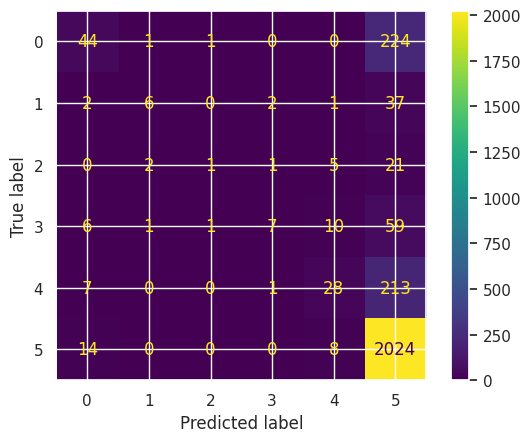

In [34]:
le_disp = ConfusionMatrixDisplay(confusion_matrix=le_cm)
le_disp.plot()
plt.show()

**Classification report using logistic regression model**

In [35]:
print(classification_report(y_test, le_pred)) 

              precision    recall  f1-score   support

           0       0.60      0.16      0.26       270
           1       0.60      0.12      0.21        48
           2       0.33      0.03      0.06        30
           3       0.64      0.08      0.15        84
           4       0.54      0.11      0.19       249
           5       0.79      0.99      0.88      2046

    accuracy                           0.77      2727
   macro avg       0.58      0.25      0.29      2727
weighted avg       0.73      0.77      0.71      2727



**KNN Algorithm**

**As part of hyperparameter tuning GridSearchCV is used. Here 1 parameter has been choosen. n_neighbors = 10,20,30**

In [36]:
from sklearn.neighbors import KNeighborsClassifier 
#params = {'n_neighbors':[10,20,30]}
#knn_reg = KNeighborsClassifier()
#knn_cv = GridSearchCV(knn_reg,params,cv=10,scoring='accuracy')
#knn_model = make_pipeline(preprocessor, knn_cv)

**Fitting the model with training dataset**

In [37]:
#knn_model.fit(x_train,y_train)

**Best parameters of KNN Model**

n_neighbors=20

In [38]:
#knn_cv.best_params_

**Best estimators of KNN Model**

In [39]:
#knn_cv.best_estimator_

**KNN Classifier using best parameters**

In [40]:
knn_model_final = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors=20))
knn_model_final.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('tfidvect', TfidfVectorizer(),
                                                  'Recipe_Review'),
                                                 ('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RecipeName', 'CommentID',
                                                   'UserID', 'UserName']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['ID', 'RecipeNumber',
                                                   'RecipeCode',
                                                   'UserReputation',
                                                   'CreationTimestamp',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=20))])

**Prediction of target data using KNN Model of test dataset**

In [41]:
knn_pred = knn_model_final.predict(x_test)

**Confusion matrix using KNN Model**

In [42]:
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm

array([[  42,    5,    0,    0,    0,  223],
       [   2,    6,    0,    0,    0,   40],
       [   3,    4,    0,    0,    0,   23],
       [   1,    6,    0,    0,    0,   77],
       [   0,    0,    0,    0,    0,  249],
       [  21,    2,    0,    0,    0, 2023]])

**Confusion Matrix graph using KNN Model**

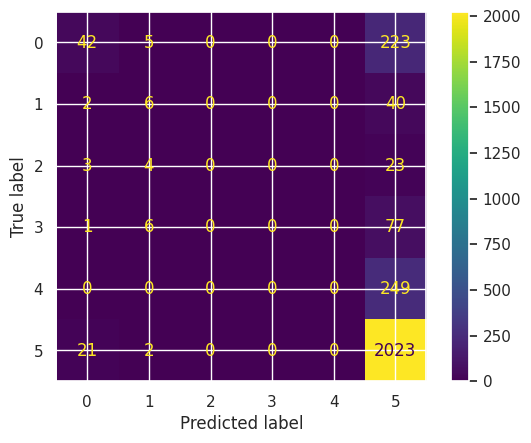

In [43]:
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_disp.plot()
plt.show()

**Classification report using KNN Model**

In [44]:
print(classification_report(y_test, knn_pred,zero_division = 0.0)) 

              precision    recall  f1-score   support

           0       0.61      0.16      0.25       270
           1       0.26      0.12      0.17        48
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        84
           4       0.00      0.00      0.00       249
           5       0.77      0.99      0.86      2046

    accuracy                           0.76      2727
   macro avg       0.27      0.21      0.21      2727
weighted avg       0.64      0.76      0.68      2727



**SVM Model**

**As part of hyperparameter tuning GridSearchCV is used. Here 3 parameters have been choosen. C=0.1,1,100 and gamma=1,0.1,0.01 and kernel = rbf**

In [45]:
from sklearn.svm import SVC
#svc_reg = SVC()
#params = {'C': [0.1, 1, 100],  
#             'gamma': [1, 0.1, 0.01], 
#            'kernel': ['rbf']}
#svc_cv = GridSearchCV(svc_reg, params, refit = True, verbose = 3) 
#svc_model = make_pipeline(preprocessor,svc_cv)

**Fitting the training data with SVC model**

In [46]:
#svc_model.fit(x_train,y_train)

**Best Parameters of SVC Model**

C=100, gamma=0.01, kernel = rbf

In [47]:
#svc_cv.best_params_

**Best estimators of SVC Model**

In [48]:
#svc_cv.best_estimator_

**SVM using best parameters**

In [49]:
svc_model_final = make_pipeline(preprocessor,SVC(C=100,gamma=0.01,kernel='rbf'))
svc_model_final.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('tfidvect', TfidfVectorizer(),
                                                  'Recipe_Review'),
                                                 ('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RecipeName', 'CommentID',
                                                   'UserID', 'UserName']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['ID', 'RecipeNumber',
                                                   'RecipeCode',
                                                   'UserReputation',
                                                   'CreationTimestamp',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore'])])),
                ('svc', SVC(C=100, gamma=0.01))])

**Predict ratings of test dataset**

In [50]:
svc_pred = svc_model_final.predict(x_test)

**Confusion matrix of SVC Model**

In [51]:
svc_cm = confusion_matrix(y_test, svc_pred)
svc_cm

array([[  52,    5,    2,    2,    5,  204],
       [   4,   10,    1,    2,    1,   30],
       [   1,    5,    2,    3,    4,   15],
       [   7,    4,    1,   12,    9,   51],
       [   3,    0,    0,    6,   32,  208],
       [  26,    2,    0,    2,   21, 1995]])

**Confusion matrix graph using SVC Model**

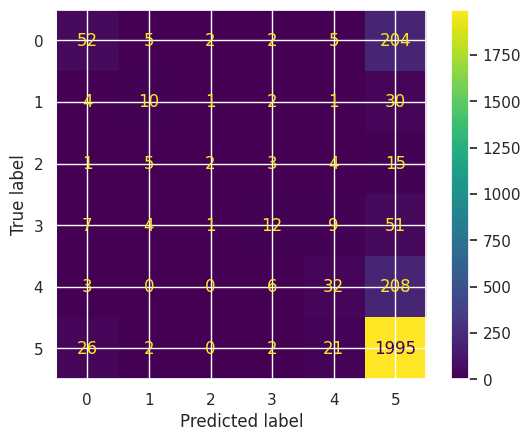

In [52]:
svc_disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm)
svc_disp.plot()
plt.show()

**Classification report of SVC Model**

In [53]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.56      0.19      0.29       270
           1       0.38      0.21      0.27        48
           2       0.33      0.07      0.11        30
           3       0.44      0.14      0.22        84
           4       0.44      0.13      0.20       249
           5       0.80      0.98      0.88      2046

    accuracy                           0.77      2727
   macro avg       0.49      0.29      0.33      2727
weighted avg       0.72      0.77      0.72      2727



**Logistic Regression score**

In [54]:
le_model_final.score(x_test,y_test)

0.7737440410707738

**KNN Classifier Score**

In [55]:
knn_model_final.score(x_test,y_test)

0.7594426109277594

**SVC Classifier Score**

In [56]:
svc_model_final.score(x_test,y_test)

0.7711771177117712

**Submission**

**SVC model is giving best score on test data. So using SVC model for final submission**

In [57]:
prediction = svc_model_final.predict(test)

In [58]:
submission = pd.DataFrame(columns = ['ID','Rating'])

In [59]:
submission['ID'] = [i+1 for i in range(len(prediction))]
submission['Rating'] = prediction
submission.to_csv('submission.csv',index = False)

In [60]:
submission

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,4
4,5,5
...,...,...
4541,4542,5
4542,4543,5
4543,4544,5
4544,4545,2
